In [8]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [11]:
df = df.drop(columns=["User ID"])

In [12]:
df.isnull().sum()

for cols in df.columns:
  print(cols, (df[cols] == 0).sum())

Gender 0
Age 0
EstimatedSalary 0
Purchased 257


In [13]:
labelEncoder = LabelEncoder()
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [14]:
df["Gender"] = labelEncoder.fit_transform(df["Gender"])

In [15]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [17]:
X = df.drop(columns=["Purchased"])
y = df["Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.92
0.9411764705882353
0.8421052631578947
0.8888888888888888


In [22]:
gender = int(input("Enter Gender (0 for female, 1 for male): "))
age = int(input("Enter Age: "))
sal = int(input("Enter Salary: "))

newdf = np.array([[gender, age, sal]])
new_pred = model.predict(newdf)

print(new_pred[0])

Enter Gender (0 for female, 1 for male): 1
Enter Age: 19
Enter Salary: 76000
0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('data.csv')
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


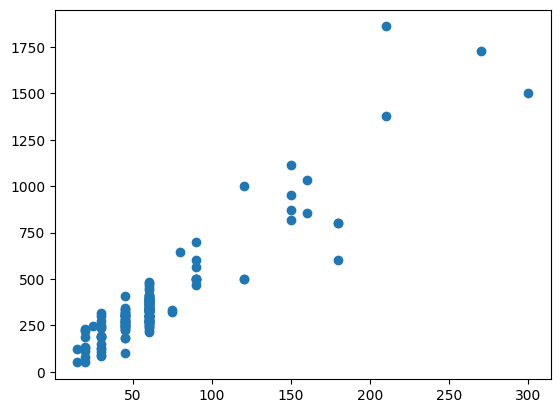

In [29]:
import matplotlib.pyplot as plt

plt.scatter(df["Duration"], df["Calories"], label="Original")

X = df[["Duration"]]
y = df["Calories"]

In [38]:
for cols in df.columns:
  print(cols, (df[cols] == np.NaN).sum())

df["Calories"] = df["Calories"].fillna(df["Calories"].median())

Duration 0
Pulse 0
Maxpulse 0
Calories 0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ValueError: Input y contains NaN.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('data.csv')

# Scatter plot of Duration vs Calories
plt.scatter(df["Duration"], df["Calories"], label="Original")
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.legend()
plt.show()

# Check for NaN values
print("NaN values before filling:")
print(df.isna().sum())

# Fill NaN values in the Calories column
df["Calories"] = df["Calories"].fillna(df["Calories"].median())

# Verify that there are no NaN values after filling
print("NaN values after filling:")
print(df.isna().sum())

# Define X and y again after NaN filling
X = df[["Duration"]]
y = df["Calories"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
